<a href="https://colab.research.google.com/github/HannaAA17/Data-Scientist-With-Python-datacamp/blob/main/Data_Camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Importing Data in Python

In [ ]:
%%capture XxXxX
!pip install sas7bdat
!gdown --id 1U7w21ixpzcs72pbllexbuXBkOxXH_U48
!unzip datasets.zip

In [ ]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

## Introduction and flat files

### Using NumPy to import flat files

In [ ]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Customizing your NumPy import

In [ ]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

# Print data
print(data)


### Importing different datatypes

In [ ]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### Working with mixed datatypes

In [ ]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

In [ ]:
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d, same as data
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])


### Using pandas to import flat files as DataFrames

In [ ]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

### Customizing your pandas import

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


## Importing data from other file types

### Excel files

In [ ]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


In [ ]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=1, names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[1], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


### SAS files

In [ ]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

In [ ]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


### h5py files

In [ ]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


In [ ]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


### matfiles

In [ ]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


In [ ]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(mat['CYratioCyt'].shape)


# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


## Working with relational databases in Python

### Creating a database engine

In [ ]:
# Import necessary module
from sqlalchemy import inspect, create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

insp = inspect(engine)
insp.get_table_names()

### The Hello World of SQL Queries!

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute('Select * From Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall(), columns=rs.keys())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

### Customizing the Hello World of SQL Queries

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3), columns=rs.keys())

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

### Filtering your database records using SQL's WHERE

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6 ")
    df = pd.DataFrame(rs.fetchall(), columns=rs.keys())

# Print the head of the DataFrame df
print(df.head())

### Ordering your SQL records with ORDER BY

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall(), columns=rs.keys())

# Print head of DataFrame
print(df.head())


### Pandas and The Hello World of SQL Queries!

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

### Pandas for more complex querying

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')


# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate', engine)

# Print head of DataFrame
print(df.head())


### The power of SQL lies in relationships between tables: INNER JOIN

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df

QUERY = (
    'SELECT Title, Name'
    ' FROM Album '
    ' INNER JOIN Artist '
    ' ON Album.ArtistID = Artist.ArtistID'
)

with engine.connect() as con:
    df = pd.read_sql_query(QUERY, engine)

# Print head of DataFrame df
print(df.head())


### Filtering your INNER JOIN

In [ ]:
# Execute query and store records in DataFrame: df
QUERY = (
    'SELECT * '
    'FROM PlaylistTrack '
    'INNER JOIN Track '
    'ON PlaylistTrack.TrackId = Track.TrackId '
    'WHERE Milliseconds < 250000'
)

with engine.connect() as con:
    df = pd.read_sql_query(QUERY, engine)

# Print head of DataFrame df
print(df.head())

# Introduction to Data Visualization with Matplotlib

In [ ]:
%%capture XxXxX
!gdown --id 1Cy9e-vf_ORDZA2oNKR0kVQksaMbVSod7
!unzip datasets.zip

In [ ]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing course datasets as DataFrames
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")

medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
summer_2016 = pd.read_csv('datasets/summer2016.csv')

austin_weather = pd.read_csv("datasets/austin_weather.csv", index_col="DATE")

weather = pd.read_csv("datasets/seattle_weather.csv", index_col="DATE")

# Some pre-processing on the weather datasets, including adding a month column
seattle_weather = weather[weather["STATION"] == "USW00094290"].copy()
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
seattle_weather["MONTH"] = month 
austin_weather["MONTH"] = month

# Some pre-processing on the summer_2016 dataset
mens_rowing = summer_2016[
    (summer_2016['Sex'] == 'M') & (summer_2016['Sport'] == 'Rowing')
]

mens_gymnastics = summer_2016[
    (summer_2016['Sex'] == 'M') & (summer_2016['Sport'] == 'Gymnastics')
]


## Introduction to Matplotlib


### Using the matplotlib.pyplot interface

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

### Adding data to an Axes object

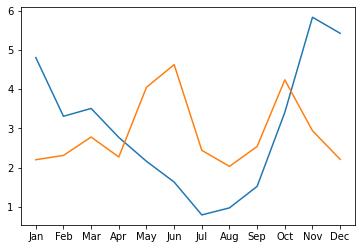

In [ ]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Call the show function
plt.show()

### Customizing data appearance

In [ ]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

# Call show to display the resulting plot
plt.show()

### Customizing axis labels and adding titles

In [ ]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

### Creating small multiples with plt.subplots

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

### Small multiples with shared y axis

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')

plt.show()

## Plotting time-series

### Read data with a time index

In [ ]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=['date'], index_col='date')

### Plot time-series data

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Using a time index to zoom in

In [ ]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01" : "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting two variables

In [ ]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

### Defining a function that plots time-series data

In [ ]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

    # Plot the inputs x,y in the provided color
    axes.plot(x, y, color=color)

    # Set the x-axis label
    axes.set_xlabel(xlabel)

    # Set the y-axis label
    axes.set_ylabel(ylabel, color=color)

    # Set the colors tick params for y-axis
    axes.tick_params('y', colors=color)

### Using a plotting function

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

### Annotating a plot of time-series data

In [ ]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

### Plotting time-series: putting it all together

In [ ]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

## Quantitative comparisons and statistical visualizations

### Bar chart

In [ ]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'], label='Gold')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

### Stacked bar chart

In [ ]:
fig, ax = plt.subplots()
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label='Bronze')

# Display the legend
ax.legend()

plt.show()

### Creating histograms

In [ ]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label='rowing')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label='gymnastics')

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

### "Step" histogram

In [ ]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], bins=5, histtype='step', label='Rowing')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], bins=5, histtype='step', label='Gymnastics')

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()

plt.show()

### Adding error-bars to a bar chart

In [ ]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot

In [ ]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

### Creating boxplots

In [ ]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing','Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

### Simple scatter plot

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

### Encoding time by color

In [ ]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

### Switching between styles

In [ ]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

plt.show()

In [ ]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()

ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

## Sharing visualizations with others

### Automate your visualization

In [ ]:
# Extract the "Sport" column
sports_column = summer_2016['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

In [ ]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
    # Extract the rows only for this sport
    sport_df = summer_2016[summer_2016['Sport'] == sport]
    # Add a bar for the "Weight" mean with std y error bar
    ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())


ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png')

### Set figure dimensions

In [ ]:
# Set figure dimensions
fig.set_size_inches([3, 5])

### save as

In [ ]:
# save as a PNG
fig.savefig('my_figure.png')
fig.savefig('my_figure_300dpi.png', dpi=300)


## old

In [ ]:
# Create a dictionary with the two lists
movie_dict = {'years': [*range(2011,2021)],
              'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

movie_dict['colors'] = [*map(lambda x: 'red' if x>=100 else 'blue', movie_dict['durations'])]

# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

In [ ]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt

fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()



In [ ]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
# fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(durations_df['years'],
            durations_df['durations'],
            c=movie_dict['colors'])

# draw horizontal line
plt.axhline(100, color='black', label="obs_diff")

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot(x="Overall rank", y="Score", data=df)
ax = sns.scatterplot(x="GDP per capita", y="Score", hue="Generosity", data=happiness)
ax = sns.jointplot(x = 'age', y = 'value', data = valuation)
plt.xticks(rotation = 45)
plt.show()
